In [6]:
# importando bibliotecas
import numpy as np
import pandas as pd

# Import das bibliotecas de IA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [7]:
# criando função para gerar dados
def gerando_dados(n_steps):
    X = [] # Conjuntos de Features
    y = [] # Conjunto de Target

    # Loop para preencher os conjuntos de Features e target
    for i in range(1000):
        # Calcula o Seno de um valor entre 0 e 2pi, adicionando
        # um valor aleatória entre -0.1 e +0.1
        X.append(
            np.sin(
                np.linspace(0, np.pi * 2, n_steps)
                + np.random.uniform(-0.1, 0.1)
            )
        )

        # Calcula o Seno de 2pi, adicionando um valor aleatória
        # entre -0.1 e +0.1
        y.append(
            np.sin(
                np.pi * 2
                + np.random.uniform(-0.1, 0.1)
            )
        )

    # Conversão das listas em Arrays Numpy
    X = np.array(X)
    y = np.array(y)

    return X, y

In [8]:
# gerando dados
n_steps = 50
X, y = gerando_dados(n_steps)

In [9]:
# visualizando o conjunto X
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.082021,0.046099,0.173462,0.297976,0.417598,0.530363,0.634419,0.728058,0.809743,0.878131,...,-0.944532,-0.894780,-0.830336,-0.752258,-0.661828,-0.560530,-0.450029,-0.332138,-0.208794,-0.082021
1,-0.060000,0.068140,0.195160,0.318976,0.437555,0.548949,0.651329,0.743014,0.822499,0.888478,...,-0.937052,-0.884705,-0.817832,-0.737530,-0.645117,-0.542112,-0.430205,-0.311235,-0.187154,-0.060000
2,-0.048125,0.079999,0.206809,0.330224,0.448216,0.558849,0.660306,0.750920,0.829204,0.893873,...,-0.932833,-0.879100,-0.810931,-0.729447,-0.635986,-0.532082,-0.419440,-0.299912,-0.175459,-0.048125
3,-0.094218,0.033864,0.161389,0.286265,0.406441,0.519942,0.624906,0.719609,0.802497,0.872207,...,-0.948483,-0.900181,-0.837098,-0.760269,-0.670958,-0.570629,-0.460930,-0.343663,-0.220753,-0.094218
4,-0.006570,0.121358,0.247294,0.369169,0.484982,0.592832,0.690948,0.777718,0.851718,0.911733,...,-0.917052,-0.858530,-0.785911,-0.700387,-0.603363,-0.496432,-0.381349,-0.260004,-0.134391,-0.006570


In [10]:
# Dividindo os dados em treinamento e teste
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [11]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dropout(0.2))  # Dropout para evitar overfitting
model.add(Dense(1))  # Camada de saída

# Compilando o modelo
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Remodelando os dados para a forma esperada pela LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# DEBUG
X_train[1]

array([[-0.0599995 ],
       [ 0.06813987],
       [ 0.19516039],
       [ 0.31897638],
       [ 0.43755479],
       [ 0.54894856],
       [ 0.65132861],
       [ 0.74301386],
       [ 0.82249885],
       [ 0.88847842],
       [ 0.93986921],
       [ 0.97582737],
       [ 0.99576247],
       [ 0.99934718],
       [ 0.98652263],
       [ 0.95749942],
       [ 0.91275408],
       [ 0.85302135],
       [ 0.77928204],
       [ 0.69274693],
       [ 0.59483694],
       [ 0.48715974],
       [ 0.37148339],
       [ 0.2497073 ],
       [ 0.12383102],
       [-0.00407856],
       [-0.13192118],
       [-0.25759765],
       [-0.37904437],
       [-0.4942672 ],
       [-0.60137417],
       [-0.6986066 ],
       [-0.78436792],
       [-0.85724995],
       [-0.91605595],
       [-0.95982034],
       [-0.98782451],
       [-0.99960863],
       [-0.9949792 ],
       [-0.97401224],
       [-0.93705202],
       [-0.88470544],
       [-0.81783202],
       [-0.73752982],
       [-0.6451174 ],
       [-0

In [13]:
# Treinando o modelo
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


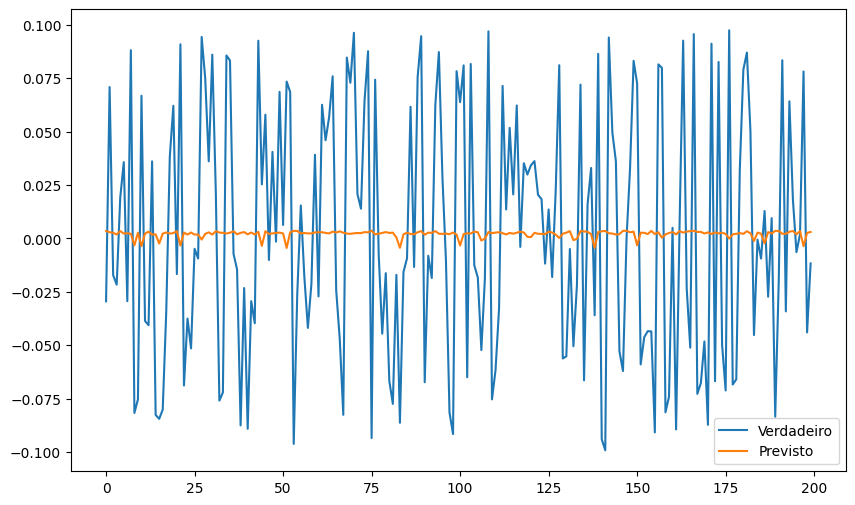

In [14]:
# Fazendo previsões
predictions = model.predict(X_test)

# Plotando os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Verdadeiro')
plt.plot(predictions, label='Previsto')
plt.legend()
plt.show()